In [51]:
import numpy as np
import cv2 as cv
import cv2
import glob
import matplotlib.pyplot as plt

In [52]:
GRID_H = 9
GRID_W = 6

In [53]:
with open("cameraCal.npy", "rb") as f:
    mtx = np.load(f)
    dist = np.load(f)
    rvecs = np.load(f)
    tvecs = np.load(f)

In [54]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((GRID_H*GRID_W,3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_H,0:GRID_W].T.reshape(-1,2)
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)


In [55]:
print("Number of object points:", objp.shape)
print("Number of image points:", corners2.shape)
print("First few object points:", objp[:3])
print("First few corner points:", corners2[:3])


Number of object points: (54, 3)
Number of image points: (54, 1, 2)
First few object points: [[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]]
First few corner points: [[[ 550.6193  3550.5713 ]]

 [[ 642.808   3318.224  ]]

 [[ 735.28076 3127.578  ]]]


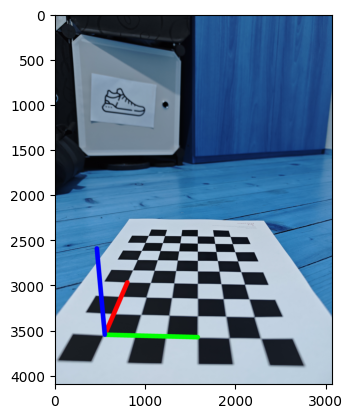

In [56]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel().astype("int32"))
    imgpts = imgpts.astype("int32")
    img = cv.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 50)
    img = cv.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 50)
    img = cv.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 50)
    return img


fname = "calibration/IMG_20241218_202738.jpg"
img = cv.imread(fname)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (GRID_H,GRID_W),None)
if ret == True:
    corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    # Find the rotation and translation vectors.
    ret,rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
    # project 3D points to image plane
    imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
    img = draw(img,corners2,imgpts)
    # cv2.drawChessboardCorners(img, (GRID_H,GRID_W), corners2, ret)
    plt.imshow(img)

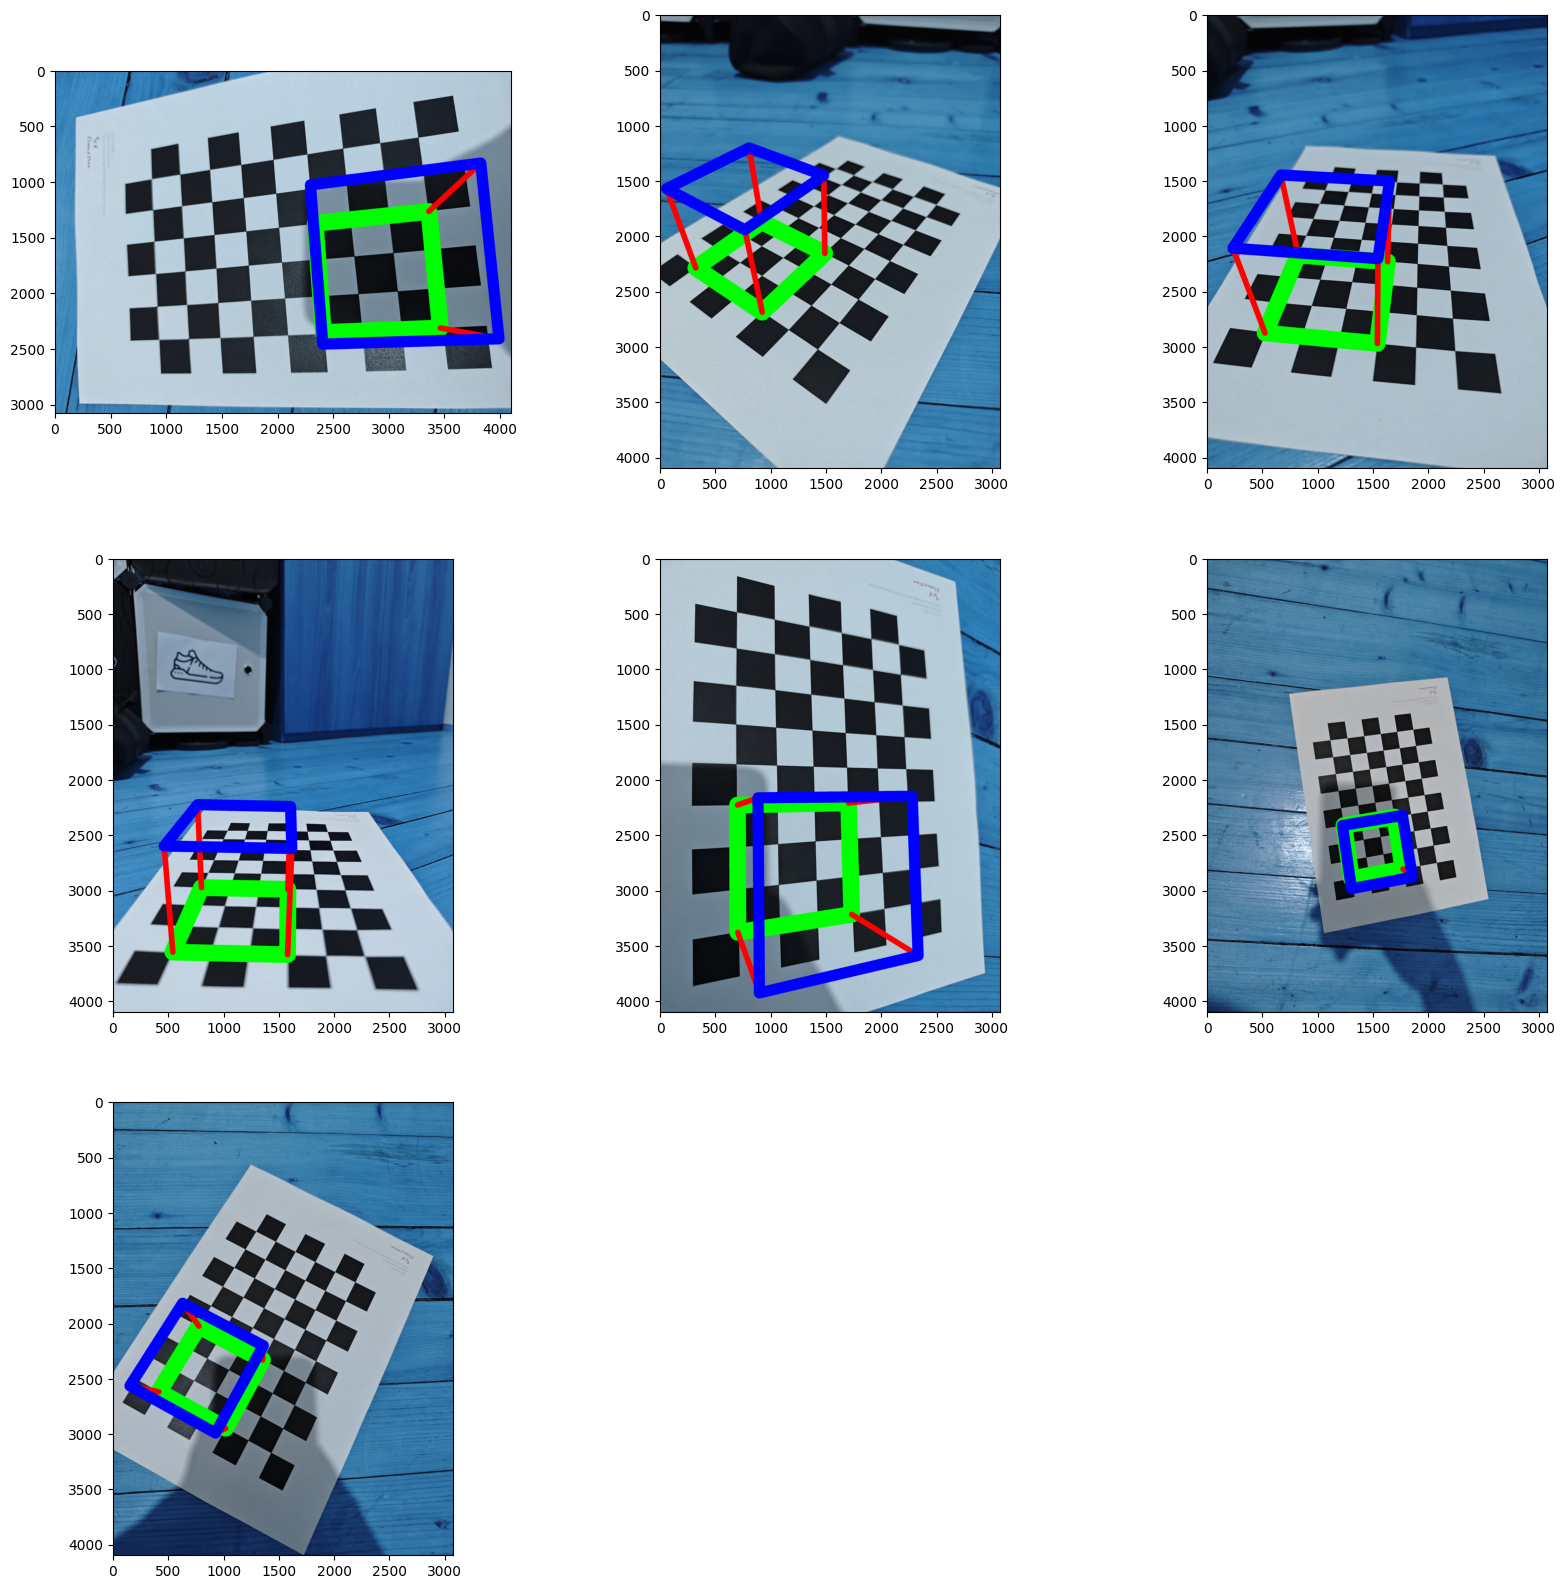

In [57]:
def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = cv.drawContours(img, [imgpts[:4]],-1,(0,255,0),150)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),50)
    # draw top layer in red color
    img = cv.drawContours(img, [imgpts[4:]],-1,(0,0,255),100)
    return img

axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

#fname = "calibration/IMG_20241218_202738.jpg"
i = 1
plt.figure(figsize = (20,20))
for fname in glob.glob('calibration/*.jpg'):
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (GRID_H,GRID_W),None)
    if ret == True:
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
        img = draw(img,corners2,imgpts)
        # cv2.drawChessboardCorners(img, (GRID_H,GRID_W), corners2, ret)
        plt.subplot(3, 3, i)
        i+=1
        plt.imshow(img)